In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import sys
import os
import seaborn as sns
from adjustText import adjust_text
from matplotlib import gridspec
%matplotlib inline

# Variance by sex-specific Effect

In [3]:
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\Phenotypes')
df_vars = pd.read_csv("pheno_variances_bysex.txt", sep="\t")
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\GWAS_Results')
df_weights = pd.read_csv("sum_mash_weights.txt", sep="\t")
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\LDSC')
df_h2 = pd.read_csv("h2_mf.txt", sep="\t")

os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\GWAS_Results')

In [4]:
df_vars = df_vars[df_vars['pheno'].isin(df_weights['phenotype'])].copy()
df_vars = df_vars.sort_values('pheno').reset_index(drop=True)
df_weights = df_weights.sort_values('phenotype').reset_index(drop=True)
df_h2 = df_h2.sort_values('phenotype').reset_index(drop=True)

df_vars['ratio_m/f'] = df_vars['m_var'] / df_vars['f_var']
df_weights['diff_m-f'] = df_weights['sum_weight_m'] - df_weights['sum_weight_f']

### diff in fractions

<ipython-input-74-73b26ec974ed>:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2)


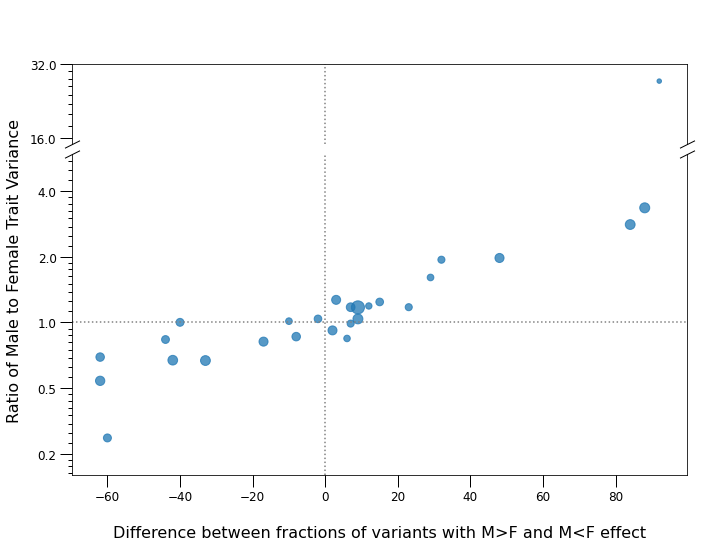

In [74]:
x=df_weights['diff_m-f']
y=df_vars['ratio_m/f']
size = df_h2.female_h2 * 400

fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 1, hspace=0.05, height_ratios=[1,4])
(ax, ax2) = gs.subplots(sharex='col')

# plot
ax.scatter(x=x, y=y, s=size, alpha = 0.75)
ax2.scatter(x=x, y=y, s=size, alpha = 0.75)
ax.set_yscale('log', base=2)
ax2.set_yscale('log', base=2)
# set y limits
ax.set_ylim(15.1, 32)  # outliers only
ax2.set_ylim(0.2, 5.9)
#hide spines
ax.spines['bottom'].set_visible(False) ; ax.xaxis.set_visible(False)
ax2.spines['top'].set_visible(False) ; ax2.spines['top'].set_visible(False)
# slants
d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# major ticks
y_major = matplotlib.ticker.LogLocator(base = 2.0, numticks = 10)
ax2.yaxis.set_major_locator(y_major)
ax2.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.1f'))
# minor ticks
y_minor = matplotlib.ticker.LogLocator(base = 2.0, subs = (2.25,2.5,2.75,3,3.25,3.5,3.75,4,), numticks = 10)
y_minor2 = matplotlib.ticker.LogLocator(base = 2.0, subs = (2.25,2.5,2.75,3,3.25,3.5,3.75,4,), numticks = 10)
ax2.yaxis.set_minor_locator(y_minor)
ax.yaxis.set_minor_locator(y_minor2)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax2.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# tick lengths
ax.tick_params(which='both', width=1,labelsize=12), ax2.tick_params(which='both', width=1,labelsize=12)
ax.tick_params(which='major', length=12), ax2.tick_params(which='major', length=12)
ax.tick_params(which='minor', length=4), ax2.tick_params(which='minor', length=4)

# dotted lines
ax.axvline(0, ls=":",c="gray"), ax2.axvline(0, ls=":",c="gray")
ax.axhline(1, ls=":",c="gray"), ax2.axhline(1, ls=":",c="gray")

# x and y label
fig.add_subplot(111, frameon=False, xticklabels="", xticks=[], yticklabels="", yticks=[])
plt.xlabel("Difference between fractions of variants with M>F and M<F effect", fontsize=16, labelpad=50)
plt.ylabel("Ratio of Male to Female Trait Variance", fontsize=16, labelpad=50)
plt.title(" ", fontsize="x-large", y=1.1)
plt.tight_layout(pad=2)
plt.savefig("phenovar_diff_fsize_test.pdf")

# make half minor tick larger
#ax3 = ax.twinx()
#ax3.scatter(x=x, y=y, s=size, alpha = 0.5)
#ax3.spines['bottom'].set_visible(False) ; ax3.xaxis.set_visible(False)
#ax3.set_yscale('log', base=2)
#ax3.yaxis.set_ticks_position('right')
#ax3.yaxis.set_major_locator(matplotlib.ticker.FixedLocator([]))
#y2_minor = matplotlib.ticker.LogLocator(base = 2.0, subs = (1,), numticks = 1)
#ax3.yaxis.set_minor_locator(y2_minor)
#ax3.tick_params(which='minor', length=8)